## 1.

*Recogiendo los datos de coronavirus de la página https://ourworldindata.org/coronavirus-source-data* 

A partir de la letra de tu DNI, elige al país que empieza por dicha letra que más fallecidos tenga. Si el país elegido no está entre el top 20 de fallecidos, elige como país España.

En este caso, utilizaremos las columnas:

- Nuevos casos
- Nuevos fallecidos
- Población
- Fallecidos totales
- Casos totales

La fecha debe estar en el índice.

1. Representa todas las columnas en un gráfica con diferentes magnitudes en el eje y para su correcta visualización.

2. Elimina la columna "Población".

3. Entrena los algoritmos de regresión que hemos visto hasta ahora para predecir dos columnas por separado: Nuevos casos y Nuevos fallecidos. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento. ¿Qué error se comete? ¿crees que los algoritmos de ML vistos hasta ahora son buenos para realizar un forecast de una serie temporal viendo los resultados?

4. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones = 23 y n_repeats = 7 para este ejercicio y solo para la columna "nuevos casos".

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv") 
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
70439,ZWE,Africa,Zimbabwe,2021-02-17,35423.0,108.0,79.857,1418.0,4.0,7.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
70440,ZWE,Africa,Zimbabwe,2021-02-18,35543.0,120.0,97.000,1420.0,2.0,8.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
70441,ZWE,Africa,Zimbabwe,2021-02-19,35710.0,167.0,95.000,1430.0,10.0,5.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
70442,ZWE,Africa,Zimbabwe,2021-02-20,35768.0,58.0,94.857,1432.0,2.0,4.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
70443,ZWE,Africa,Zimbabwe,2021-02-21,35796.0,28.0,89.143,1436.0,4.0,5.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [3]:
# Paises que empiezan por Z
df_Z = df[df['location'].str.startswith('Z')]
df_Z

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
69764,ZMB,Africa,Zambia,2020-03-18,2.0,2.0,NaN,NaN,NaN,NaN,...,3689.251,57.5,234.499,3.94,3.1,24.7,13.938,2.0,63.89,0.584
69765,ZMB,Africa,Zambia,2020-03-19,2.0,0.0,NaN,NaN,NaN,NaN,...,3689.251,57.5,234.499,3.94,3.1,24.7,13.938,2.0,63.89,0.584
69766,ZMB,Africa,Zambia,2020-03-20,2.0,0.0,NaN,NaN,NaN,NaN,...,3689.251,57.5,234.499,3.94,3.1,24.7,13.938,2.0,63.89,0.584
69767,ZMB,Africa,Zambia,2020-03-21,2.0,0.0,NaN,NaN,NaN,NaN,...,3689.251,57.5,234.499,3.94,3.1,24.7,13.938,2.0,63.89,0.584
69768,ZMB,Africa,Zambia,2020-03-22,3.0,1.0,NaN,NaN,NaN,NaN,...,3689.251,57.5,234.499,3.94,3.1,24.7,13.938,2.0,63.89,0.584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70439,ZWE,Africa,Zimbabwe,2021-02-17,35423.0,108.0,79.857,1418.0,4.0,7.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
70440,ZWE,Africa,Zimbabwe,2021-02-18,35543.0,120.0,97.000,1420.0,2.0,8.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
70441,ZWE,Africa,Zimbabwe,2021-02-19,35710.0,167.0,95.000,1430.0,10.0,5.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
70442,ZWE,Africa,Zimbabwe,2021-02-20,35768.0,58.0,94.857,1432.0,2.0,4.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [4]:
# Agrupo los países y cojo el número más alto de total deaths
df_Z.groupby(['location'], sort=False)['total_deaths'].max()

location
Zambia      1020.0
Zimbabwe    1436.0
Name: total_deaths, dtype: float64

In [5]:
# Agrupo los países, cojo el número más alto de total deaths, ordenos los países de mayor a menor número de muertes y cojo los 26 primeros, ya que los 6 primeros son números generales de World, Europe, North America...
df.groupby(['location'])['total_deaths'].max().sort_values(ascending=False).head(26)

location
World             2466255.0
Europe             791790.0
North America      726124.0
European Union     529547.0
United States      498897.0
South America      453964.0
Asia               392079.0
Brazil             246504.0
Mexico             180107.0
India              156385.0
United Kingdom     120810.0
Africa             101336.0
Italy               95718.0
France              83546.0
Russia              81926.0
Germany             67946.0
Spain               67101.0
Iran                59483.0
Colombia            58834.0
Argentina           51198.0
South Africa        49053.0
Peru                45097.0
Poland              42171.0
Indonesia           34489.0
Turkey              28060.0
Ukraine             26470.0
Name: total_deaths, dtype: float64

In [6]:
df_Spain = df[df['location'].str.startswith('Spain')]
df_Spain

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
59473,ESP,Europe,Spain,2020-02-01,1.0,1.0,NaN,NaN,NaN,NaN,...,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904
59474,ESP,Europe,Spain,2020-02-02,1.0,0.0,NaN,NaN,NaN,NaN,...,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904
59475,ESP,Europe,Spain,2020-02-03,1.0,0.0,NaN,NaN,NaN,NaN,...,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904
59476,ESP,Europe,Spain,2020-02-04,1.0,0.0,NaN,NaN,NaN,NaN,...,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904
59477,ESP,Europe,Spain,2020-02-05,1.0,0.0,NaN,NaN,NaN,NaN,...,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59855,ESP,Europe,Spain,2021-02-17,3107172.0,10829.0,11938.714,66316.0,337.0,373.143,...,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904
59856,ESP,Europe,Spain,2021-02-18,3121687.0,14515.0,11461.857,66704.0,388.0,355.286,...,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904
59857,ESP,Europe,Spain,2021-02-19,3133122.0,11435.0,11012.429,67101.0,397.0,336.286,...,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904
59858,ESP,Europe,Spain,2021-02-20,3133122.0,0.0,11012.429,67101.0,0.0,336.286,...,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904


In [7]:
df_Spain = df_Spain[["date", "total_cases", "new_cases", "total_deaths", "new_deaths", "population"]]
df_Spain

,date,total_cases,new_cases,total_deaths,new_deaths,population
59473,2020-02-01,1.0,1.0,NaN,NaN,46754783.0
59474,2020-02-02,1.0,0.0,NaN,NaN,46754783.0
59475,2020-02-03,1.0,0.0,NaN,NaN,46754783.0
59476,2020-02-04,1.0,0.0,NaN,NaN,46754783.0
59477,2020-02-05,1.0,0.0,NaN,NaN,46754783.0
...,...,...,...,...,...,...
59855,2021-02-17,3107172.0,10829.0,66316.0,337.0,46754783.0
59856,2021-02-18,3121687.0,14515.0,66704.0,388.0,46754783.0
59857,2021-02-19,3133122.0,11435.0,67101.0,397.0,46754783.0
59858,2021-02-20,3133122.0,0.0,67101.0,0.0,46754783.0


In [8]:
df_Spain = df_Spain.set_index('date')
df_Spain

,total_cases,new_cases,total_deaths,new_deaths,population
date,,,,,
2020-02-01,1.0,1.0,NaN,NaN,46754783.0
2020-02-02,1.0,0.0,NaN,NaN,46754783.0
2020-02-03,1.0,0.0,NaN,NaN,46754783.0
2020-02-04,1.0,0.0,NaN,NaN,46754783.0
2020-02-05,1.0,0.0,NaN,NaN,46754783.0
...,...,...,...,...,...
2021-02-17,3107172.0,10829.0,66316.0,337.0,46754783.0
2021-02-18,3121687.0,14515.0,66704.0,388.0,46754783.0
2021-02-19,3133122.0,11435.0,67101.0,397.0,46754783.0


### 1. Representa todas las columnas en un gráfica con diferentes magnitudes en el eje y para su correcta visualización.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

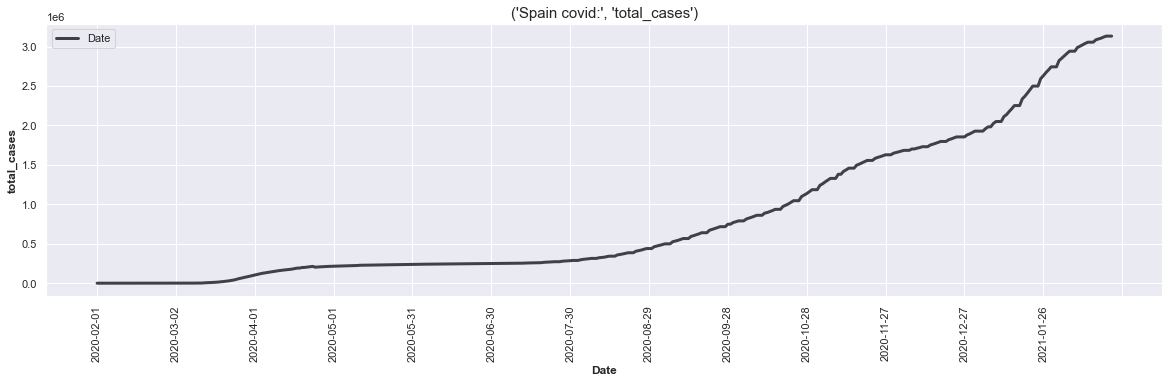

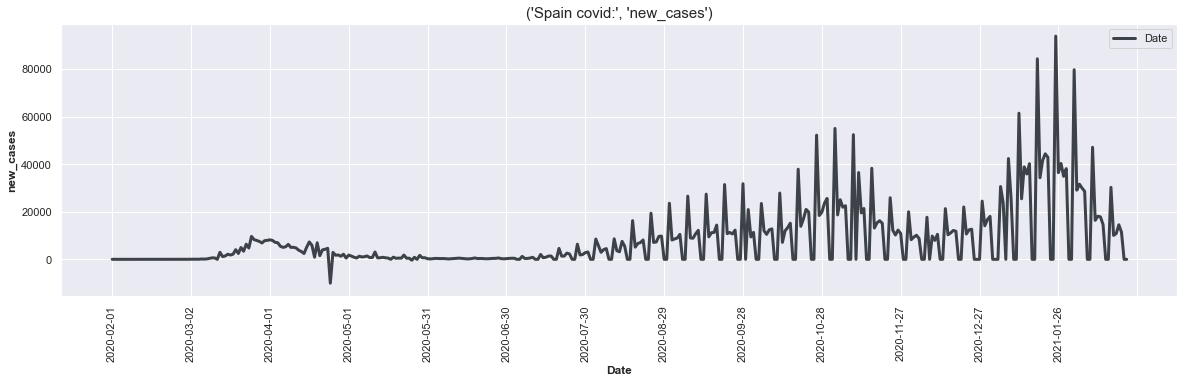

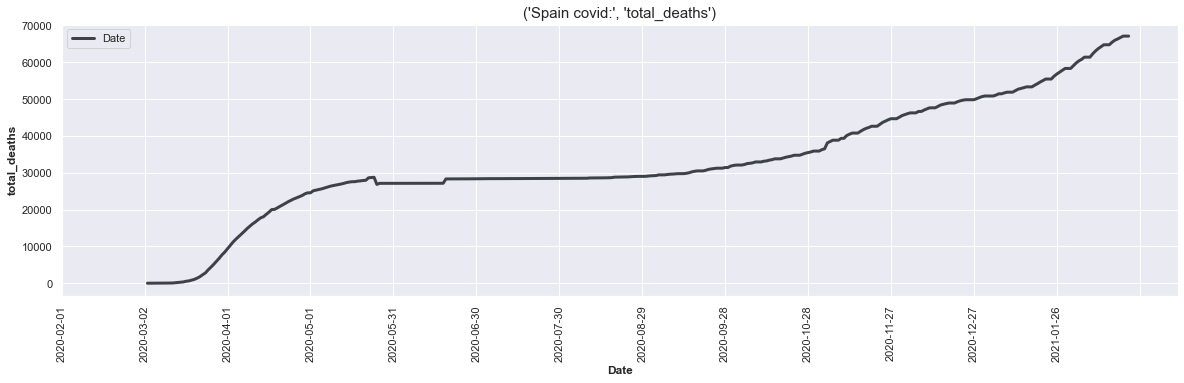

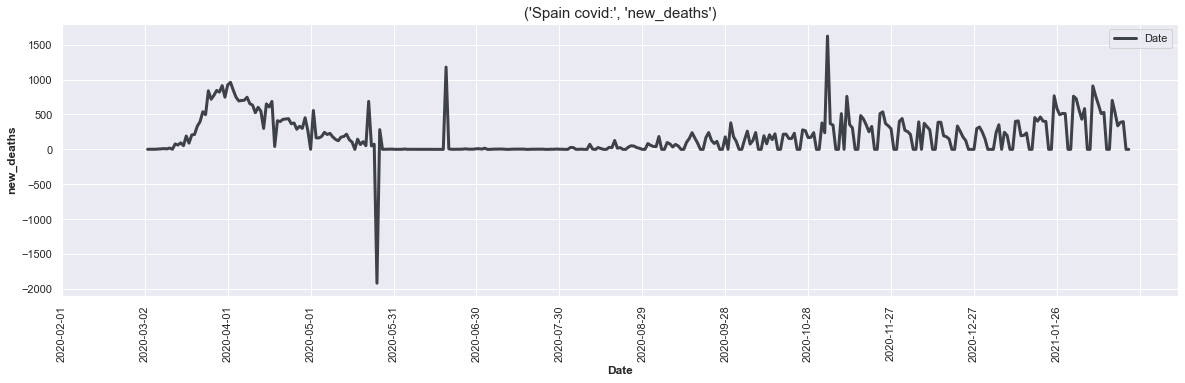

In [10]:
# Seaborn Visualization
sns.set()

# Creating the graph
list_column = ["total_cases", "new_cases", "total_deaths", "new_deaths"]

for column in list_column:
    plt.figure(figsize=(20, 5))
    plt.plot(df_Spain.index.values, df_Spain[column], color='#3d4248', linewidth= 3, label="Date")

    # Labels
    plt.xlabel("Date", weight="bold")
    plt.ylabel(column, weight="bold")
    plt.xticks(range(0, 400, 30), rotation="90")
    plt.title(label = ("Spain covid:", column), fontdict = {'fontsize':15})
    plt.legend()

    # Showing the graph
    plt.show


### 2. Elimina la columna "Población".

In [11]:
# df_Spain = df_Spain.drop('population', axis=1)
df_Spain

,total_cases,new_cases,total_deaths,new_deaths,population
date,,,,,
2020-02-01,1.0,1.0,NaN,NaN,46754783.0
2020-02-02,1.0,0.0,NaN,NaN,46754783.0
2020-02-03,1.0,0.0,NaN,NaN,46754783.0
2020-02-04,1.0,0.0,NaN,NaN,46754783.0
2020-02-05,1.0,0.0,NaN,NaN,46754783.0
...,...,...,...,...,...
2021-02-17,3107172.0,10829.0,66316.0,337.0,46754783.0
2021-02-18,3121687.0,14515.0,66704.0,388.0,46754783.0
2021-02-19,3133122.0,11435.0,67101.0,397.0,46754783.0


### 3. Entrena los algoritmos de regresión que hemos visto hasta ahora para predecir dos columnas por separado: Nuevos casos y Nuevos fallecidos. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento. ¿Qué error se comete? ¿crees que los algoritmos de ML vistos hasta ahora son buenos para realizar un forecast de una serie temporal viendo los resultados?
